## Merge-ATO-Outputs.py

This script demonstrates how to merge Access to Opportunities (ATO) tables from multiple years into one table. It also formats the columns to match the schema of the table at:

https://data.wfrc.org/datasets/access-to-opportunities-work-related-taz-based?geometry=-117.122%2C40.025%2C-106.669%2C41.481

### Import required libraries

In [1]:
from arcpy import TableToTable_conversion
from arcpy import env
import pandas as pd
import matplotlib.pyplot as plt
import os

### Build pathways to dbf files using os module

In [2]:
# Get the current working directory using os module
working_directory = os.getcwd()
print(working_directory)

E:\GitHub\Merge-ATO-Outputs


In [3]:
# Store highest common directory path
#scenarios = os.path.join(working_directory, r'TDM\0 - ModelDev\Official Release\v8.3.1\WF TDM v8.3.1 - 2020-05-08\Scenarios')
scenarios = os.path.join(working_directory, r'Data\TDM_ATO_Output_RTP_v831-20200817')

# Store path to each ATO dbf file
#dbf_2019 = os.path.join(scenarios, r'BY_2019\7_PostProcessing\Access_to_Opportunity_2019.dbf')
#dbf_2030 = os.path.join(scenarios, r'Need_2030\7_PostProcessing\Access_to_Opportunity_2030.dbf')
#dbf_2040 = os.path.join(scenarios, r'Need_2040\7_PostProcessing\Access_to_Opportunity_2040.dbf')
#dbf_2050 = os.path.join(scenarios, r'Need_2050\7_PostProcessing\Access_to_Opportunity_2050.dbf')
dbf_2019 = os.path.join(scenarios, r'Access_to_Opportunity_2019.dbf')
dbf_2030 = os.path.join(scenarios, r'Access_to_Opportunity_2030.dbf')
dbf_2040 = os.path.join(scenarios, r'Access_to_Opportunity_2040.dbf')
dbf_2050 = os.path.join(scenarios, r'Access_to_Opportunity_2050.dbf')

### Ensure path to dbf was created properly

In [4]:
dbf_2019

'E:\\GitHub\\Merge-ATO-Outputs\\Data\\TDM_ATO_Output_RTP_v831-20200817\\Access_to_Opportunity_2019.dbf'

#### Use Arcpy to convert dbfs to csvs

In [5]:
# Create function that converts dbfs to csvs using arcpy
def dbfToCSV(dbf, csv):
    TableToTable_conversion(dbf, os.path.dirname(csv), os.path.basename(csv))

# Allow arcpy to overwrite output files
env.overwriteOutput = True

# store location of data folder
results_folder = os.path.join(os.getcwd(), 'Results')

# Store names for output csvs
csv_2019 = os.path.join(results_folder, 'Access_to_Opportunity_2019.csv')
csv_2030 = os.path.join(results_folder, 'Access_to_Opportunity_2030.csv')
csv_2040 = os.path.join(results_folder, 'Access_to_Opportunity_2040.csv')
csv_2050 = os.path.join(results_folder, 'Access_to_Opportunity_2050.csv')

# convert dbfs to csvs
dbfToCSV(dbf_2019, csv_2019)
dbfToCSV(dbf_2030, csv_2030)
dbfToCSV(dbf_2040, csv_2040)
dbfToCSV(dbf_2050, csv_2050)

### Read tables into Pandas

In [6]:
# Read 2019 dbf5 as pandas dataframe object
df_2019 = pd.read_csv(csv_2019)
df_2030 = pd.read_csv(csv_2030)
df_2040 = pd.read_csv(csv_2040)
df_2050 = pd.read_csv(csv_2050)

# Drop unneeded OID column created by arcpy
df_2019 = df_2019.drop(['OID_'], axis=1)
df_2030 = df_2030.drop(['OID_'], axis=1)
df_2040 = df_2040.drop(['OID_'], axis=1)
df_2050 = df_2050.drop(['OID_'], axis=1)

### Preview tables (Optional)

In [7]:
# Show the first 5 rows of a table
df_2019.head()

,TAZID,CO_TAZID,DEVACRES,HH,JOB,AUTO_JB,AUTO_HH,TRAN_JB,TRAN_HH,COMP_AUTO,COMP_TRAN,AUTO_JB_WT,AUTO_HH_WT,TRAN_JB_WT,TRAN_HH_WT
0,1,30001,374.61,1.1,0.0,30088,20321,0,0,30088,0,33096,0,0,0
1,2,30002,638.02,15.2,3.6,32971,22315,0,0,31737,0,501162,80335,0,0
2,3,30003,470.79,5.1,2.6,33942,22986,0,0,31533,0,173104,59765,0,0
3,4,30004,779.84,21.0,24.1,33242,22501,0,0,29072,0,698077,542272,0,0
4,5,30005,395.38,30.5,69.5,41857,28503,0,0,34413,0,1276652,1980979,0,0


In [8]:
# Show number of rows and columns
nRows = df_2019.shape[0]
nColumns = df_2019.shape[1]
print("There are {} rows and {} columns".format(nRows, nColumns))

There are 2881 rows and 15 columns


In [9]:
# Show column names
for column in list(df_2019.columns):
    print(column)

TAZID
CO_TAZID
DEVACRES
HH
JOB
AUTO_JB
AUTO_HH
TRAN_JB
TRAN_HH
COMP_AUTO
COMP_TRAN
AUTO_JB_WT
AUTO_HH_WT
TRAN_JB_WT
TRAN_HH_WT


#### Prepping and Formatting tables 

In [10]:
# Create the base table, the .copy() creates a new table instead of referencing the old one in memory
base_table = df_2019[['TAZID', 'CO_TAZID', 'DEVACRES']].copy()

# Desired columns to subset by 
columns = ['CO_TAZID', 'HH', 'JOB', 'AUTO_JB', 'AUTO_HH', 'TRAN_JB', 'TRAN_HH', \
           'COMP_AUTO', 'COMP_TRAN']

# subset tables to desired columns
df_2019_subset = df_2019[columns].copy()
df_2030_subset = df_2030[columns].copy()
df_2040_subset = df_2040[columns].copy()
df_2050_subset = df_2050[columns].copy()

# Show Column names before conversion
print("ATO 2040 Column names (BEFORE):")
print(list(df_2040_subset.columns))

# Rename columns, concatenating year to the end
df_2019_subset.columns = ['CO_TAZID', 'HH_19', 'JOB_19', 'JOBAUTO_19', 'HHAUTO_19', 'JOBTRANSIT_19', 'HHTRANSIT_19', \
           'COMPAUTO_19', 'COMPTRANSIT_19']

df_2030_subset.columns = ['CO_TAZID', 'HH_30', 'JOB_30', 'JOBAUTO_30', 'HHAUTO_30', 'JOBTRANSIT_30', 'HHTRANSIT_30', \
           'COMPAUTO_30', 'COMPTRANSIT_30']

df_2040_subset.columns = ['CO_TAZID', 'HH_40', 'JOB_40', 'JOBAUTO_40', 'HHAUTO_40', 'JOBTRANSIT_40', 'HHTRANSIT_40', \
           'COMPAUTO_40', 'COMPTRANSIT_40']

df_2050_subset.columns = ['CO_TAZID', 'HH_50', 'JOB_50', 'JOBAUTO_50', 'HHAUTO_50', 'JOBTRANSIT_50', 'HHTRANSIT_50', \
           'COMPAUTO_50', 'COMPTRANSIT_50']

ATO 2040 Column names (BEFORE):
['CO_TAZID', 'HH', 'JOB', 'AUTO_JB', 'AUTO_HH', 'TRAN_JB', 'TRAN_HH', 'COMP_AUTO', 'COMP_TRAN']


In [11]:
# Show Column names after renaming
print("ATO 2040 Column names (AFTER):")
print(list(df_2040_subset.columns))

ATO 2040 Column names (AFTER):
['CO_TAZID', 'HH_40', 'JOB_40', 'JOBAUTO_40', 'HHAUTO_40', 'JOBTRANSIT_40', 'HHTRANSIT_40', 'COMPAUTO_40', 'COMPTRANSIT_40']


#### Join the tables (Method #1)

In [12]:
# Join tables to the base table using CO_TAZID field
ato_table = base_table

ato_table = ato_table.merge(df_2019_subset, left_on = 'CO_TAZID', right_on = 'CO_TAZID' , how = 'inner')
ato_table = ato_table.merge(df_2030_subset, left_on = 'CO_TAZID', right_on = 'CO_TAZID' , how = 'inner')
ato_table = ato_table.merge(df_2040_subset, left_on = 'CO_TAZID', right_on = 'CO_TAZID' , how = 'inner')
ato_table = ato_table.merge(df_2050_subset, left_on = 'CO_TAZID', right_on = 'CO_TAZID' , how = 'inner')

#### Join the tables using a For-Loop (Method #2)

In [13]:
# store ATO by year into list
tables = [df_2019_subset, df_2030_subset, df_2040_subset, df_2050_subset]

# Use for loop to join each year table to the base table using CO_TAZID field
ato_table = base_table

for table in tables:
    ato_table = ato_table.merge(table, left_on = 'CO_TAZID', right_on = 'CO_TAZID' , how = 'inner')

In [14]:
# Show number of rows and columns
nRows = ato_table.shape[0]
nColumns = ato_table.shape[1]
print("There are {} rows and {} columns".format(nRows, nColumns))
print(ato_table.shape)

There are 2881 rows and 35 columns
(2881, 35)


In [15]:
# Show first 5 rows of merged table
ato_table.head()

,TAZID,CO_TAZID,DEVACRES,HH_19,JOB_19,JOBAUTO_19,HHAUTO_19,JOBTRANSIT_19,HHTRANSIT_19,COMPAUTO_19,...,COMPAUTO_40,COMPTRANSIT_40,HH_50,JOB_50,JOBAUTO_50,HHAUTO_50,JOBTRANSIT_50,HHTRANSIT_50,COMPAUTO_50,COMPTRANSIT_50
0,1,30001,374.61,1.1,0.0,30088,20321,0,0,30088,...,35679,0,2.8,0.0,34895,28037,0,0,34895,0
1,2,30002,638.02,15.2,3.6,32971,22315,0,0,31737,...,38077,0,16.7,3.6,38281,30795,0,0,37411,0
2,3,30003,470.79,5.1,2.6,33942,22986,0,0,31533,...,38295,0,6.6,2.6,39419,31720,0,0,37928,0
3,4,30004,779.84,21.0,24.1,33242,22501,0,0,29072,...,35539,0,21.0,34.4,38600,31052,0,0,34829,0
4,5,30005,395.38,30.5,69.5,41857,28503,0,0,34413,...,43378,0,34.8,73.1,48741,39331,0,0,43457,0


#### Exporting the joined table

In [16]:
# Create name for output csv
out_table = os.path.join(results_folder, 'ATO.csv')

# export data frame to csv
ato_table.to_csv(out_table, index=False)

#### Join and convert to feature dataset

In [17]:
# import required functions, faster than importing all of arcpy
from arcpy import FeatureClassToFeatureClass_conversion
from arcpy import AddJoin_management
from arcpy import MakeTableView_management
from arcpy import MakeFeatureLayer_management
from arcpy import CreateFileGDB_management
from arcpy import env
env.OverwriteOutput = True

# Store path to TAZ boundary
taz_boundary = r'.\Data\TAZ_Boundary.gdb\TAZ_WFRC_UTM12'

# create temp datasets
taz_layer = MakeFeatureLayer_management(taz_boundary,"taz")
ato_layer = MakeTableView_management(out_table, "ato")

# join the layer and tableview
taz_ato = AddJoin_management(taz_layer, 'CO_TAZID', ato_layer, 'CO_TAZID')

# Create file gdb for output
out_gdb = CreateFileGDB_management(r'.\Results', 'TAZ_Boundary.gdb')

# Copy joined tables in fgdb
FeatureClassToFeatureClass_conversion(taz_ato, out_gdb, 'ATO')

<Result '.\\Results\\TAZ_Boundary.gdb\\ATO'>

#### Join and convert to shapefile

In [18]:
# Store path to TAZ boundary
taz_boundary = os.path.join(os.getcwd(), r'Data\TAZ_WFRC_UTM12.shp')

# create temp datasets
taz_layer = MakeFeatureLayer_management(taz_boundary,"taz")
ato_layer = MakeTableView_management(out_table, "ato")

# join the layer and tableview
taz_ato = AddJoin_management(taz_layer, 'CO_TAZID', ato_layer, 'CO_TAZID')

# Copy joined tables in fgdb
FeatureClassToFeatureClass_conversion(taz_ato, results_folder, 'ATO.shp')

<Result 'E:\\GitHub\\Merge-ATO-Outputs\\Results\\ATO.shp'>

#### Calculate Standard Deviation for each Column

In [19]:
ato_table.std(numeric_only=True)

TAZID                831.817388
CO_TAZID          142548.810459
DEVACRES             575.136729
HH_19                315.902154
JOB_19              1236.816320
JOBAUTO_19        121726.234260
HHAUTO_19          55392.522131
JOBTRANSIT_19      19712.193595
HHTRANSIT_19        6109.624106
COMPAUTO_19        96452.229594
COMPTRANSIT_19     12078.174162
HH_30                360.705587
JOB_30              1317.425676
JOBAUTO_30        130849.778285
HHAUTO_30          61512.499992
JOBTRANSIT_30      22328.193206
HHTRANSIT_30        8222.122720
COMPAUTO_30       106277.636889
COMPTRANSIT_30     14874.847658
HH_40                427.701490
JOB_40              1406.973011
JOBAUTO_40        136090.699463
HHAUTO_40          64693.254617
JOBTRANSIT_40      23212.480093
HHTRANSIT_40        9405.185668
COMPAUTO_40       111039.311874
COMPTRANSIT_40     16118.557297
HH_50                485.627505
JOB_50              1500.619330
JOBAUTO_50        137829.964887
HHAUTO_50          65244.497226
JOBTRANS

#### Load older ATO calculations from WFRC website

In [20]:
# Read in old ATO csv into pandas
ato_old = pd.read_csv(os.path.join(os.getcwd(), "Data\\ATO_From_Web.csv"))

# Check dimensions of old ato data\n"
print(ato_old.shape)
print()

print(list(ato_old.columns))
print()

(2858, 39)

['FID', 'TAZID', 'CO_TAZID', 'DEVACRES', 'SA_2016', 'HH_19', 'JOB_19', 'JOBAUTO_19', 'HHAUTO_19', 'JOBTRANSIT_19', 'HHTRANSIT_19', 'COMPAUTO_19', 'COMPTRANSIT_19', 'HH_30', 'JOB_30', 'JOBAUTO_30', 'HHAUTO_30', 'JOBTRANSIT_30', 'HHTRANSIT_30', 'COMPAUTO_30', 'COMPTRANSIT_30', 'HH_40', 'JOB_40', 'JOBAUTO_40', 'HHAUTO_40', 'JOBTRANSIT_40', 'HHTRANSIT_40', 'COMPAUTO_40', 'COMPTRANSIT_40', 'HH_50', 'JOB_50', 'JOBAUTO_50', 'HHAUTO_50', 'JOBTRANSIT_50', 'HHTRANSIT_50', 'COMPAUTO_50', 'COMPTRANSIT_50', 'SHAPE_Length', 'SHAPE_Area']



#### Join Old ATO table to New ATO table using "CO_TAZID" as join field, the "inner" argument ensures that only matching records are kept



In [21]:
# Merge new and old ATO data, old fields will have a "y" concatenated to them
merged_table = ato_table.merge(ato_old, left_on="CO_TAZID", right_on="CO_TAZID", how = 'inner')

# Check
print(merged_table.shape)
print()

print(list(merged_table.columns))

(2858, 73)

['TAZID_x', 'CO_TAZID', 'DEVACRES_x', 'HH_19_x', 'JOB_19_x', 'JOBAUTO_19_x', 'HHAUTO_19_x', 'JOBTRANSIT_19_x', 'HHTRANSIT_19_x', 'COMPAUTO_19_x', 'COMPTRANSIT_19_x', 'HH_30_x', 'JOB_30_x', 'JOBAUTO_30_x', 'HHAUTO_30_x', 'JOBTRANSIT_30_x', 'HHTRANSIT_30_x', 'COMPAUTO_30_x', 'COMPTRANSIT_30_x', 'HH_40_x', 'JOB_40_x', 'JOBAUTO_40_x', 'HHAUTO_40_x', 'JOBTRANSIT_40_x', 'HHTRANSIT_40_x', 'COMPAUTO_40_x', 'COMPTRANSIT_40_x', 'HH_50_x', 'JOB_50_x', 'JOBAUTO_50_x', 'HHAUTO_50_x', 'JOBTRANSIT_50_x', 'HHTRANSIT_50_x', 'COMPAUTO_50_x', 'COMPTRANSIT_50_x', 'FID', 'TAZID_y', 'DEVACRES_y', 'SA_2016', 'HH_19_y', 'JOB_19_y', 'JOBAUTO_19_y', 'HHAUTO_19_y', 'JOBTRANSIT_19_y', 'HHTRANSIT_19_y', 'COMPAUTO_19_y', 'COMPTRANSIT_19_y', 'HH_30_y', 'JOB_30_y', 'JOBAUTO_30_y', 'HHAUTO_30_y', 'JOBTRANSIT_30_y', 'HHTRANSIT_30_y', 'COMPAUTO_30_y', 'COMPTRANSIT_30_y', 'HH_40_y', 'JOB_40_y', 'JOBAUTO_40_y', 'HHAUTO_40_y', 'JOBTRANSIT_40_y', 'HHTRANSIT_40_y', 'COMPAUTO_40_y', 'COMPTRANSIT_40_y', 'HH_50_y', 

#### Compare older ATO calculations with new data

In [22]:
# Compare Jobs accessible via auto (2040)
job_auto_2040 = merged_table[['CO_TAZID','JOBAUTO_40_x', 'JOBAUTO_40_y']].copy()
job_auto_2040.head(15)


,CO_TAZID,JOBAUTO_40_x,JOBAUTO_40_y
0,30001,35679,40311.612283
1,30002,39137,44125.125747
2,30003,40299,45420.998210
3,30004,39462,44508.197343
4,30005,49824,55929.271967
5,30006,51020,57268.063715
6,30007,42697,47982.195651
7,30008,26288,29653.505508
8,30009,27599,31129.733371
9,30010,30385,34251.826759


In [23]:
# Calculate the difference in DEVACRES, just to confirm join worked correctly
merged_table['DEVACRES_DIFF'] = merged_table['DEVACRES_x'] - merged_table['DEVACRES_y']
average_diff = merged_table['DEVACRES_DIFF'].map(abs).mean()
print("Average Absolute Difference: {}".format(average_diff))

Average Absolute Difference: 0.084454163750877


In [24]:
#Calculate the difference in Jobs accessible via auto (2040), store in new column
merged_table['JOBAUTO_40_DIFF'] = merged_table['JOBAUTO_40_x'] - merged_table['JOBAUTO_40_y']

average_diff = merged_table['JOBAUTO_40_DIFF'].head(15).map(abs).mean()
print("Average Absolute Difference: {}".format(average_diff))

Average Absolute Difference: 5149.471854546663


#### Scatterplot comparing New and Old values

In [25]:
# get a sample of the data (first 1000 rows in table)
job_auto_2040_sample = job_auto_2040.head(1000).copy()

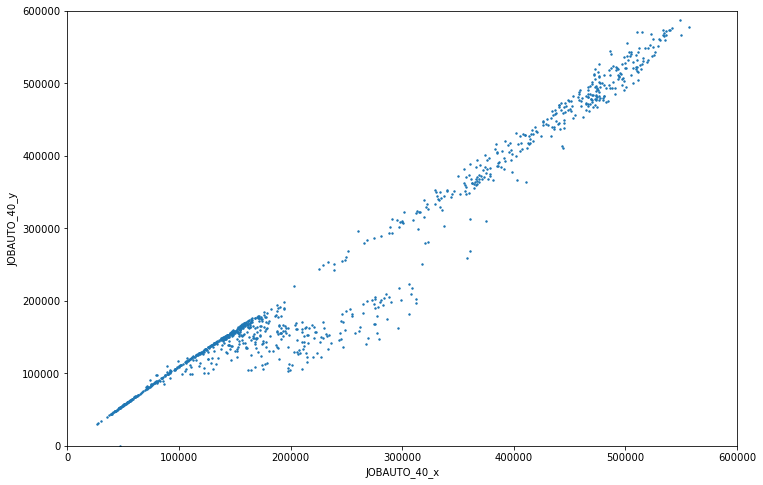

In [26]:
# Scatterplot function using new and old data, s argument controls the dot size
job_auto_2040_sample.plot.scatter(x='JOBAUTO_40_x', y= 'JOBAUTO_40_y', figsize=(12,8), s=2, xlim=(0,600000), ylim=(0,600000))

#### Plot the New and Old values together

In [27]:
# get a sample of the data (first 1000 rows in table)
job_auto_2040_sample = job_auto_2040.head(30000).copy()

[Text(0, 0.5, 'Jobs'), Text(0.5, 0, 'Index')]

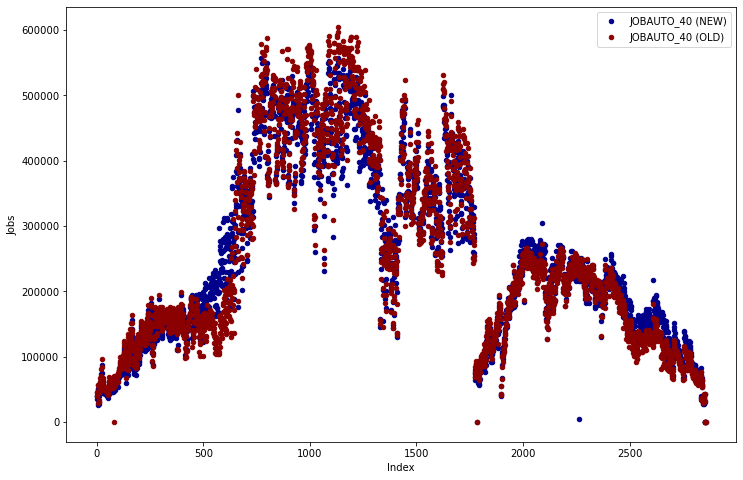

In [28]:
# add index for use as x variable, since CO_TAZID is not continous
job_auto_2040_sample['fid'] = job_auto_2040_sample.index

# Plot first variable (new data)
ax = job_auto_2040_sample.plot.scatter(x='fid', y='JOBAUTO_40_x', color='DarkBlue', label='JOBAUTO_40 (NEW)', figsize=(12,8))

# Plot second variable (old data)
job_auto_2040_sample.plot.scatter(x='fid', y='JOBAUTO_40_y', color='DarkRed', label='JOBAUTO_40 (OLD)', ax=ax)
ax.set(xlabel='Index', ylabel='Jobs')